# Journal Names

Questions in the context of fuzzy matching.

* How many journal names appear more than once?
* What is the average length of the duplicated names vs the unique names?


Input file is a single larger JSON, mapping names to issns.
```json
{
  "Acta Orientalia.": [
    "0001-6438"
  ],
  "Acta Orientalia (København)": [
    "0001-6438"
  ],
..
```

In [62]:
import json
import pandas as pd

In [63]:
with open("../data/name_to_issn.json") as f:
    mapping = json.load(f)

We have about 3M keys.

In [64]:
len(mapping)

2938859

In [65]:
df = pd.DataFrame(((k, len(v)) for k, v in mapping.items()), columns=["name", "issn_count"])

In [66]:
len(df)

2938859

In [67]:
df.head()

,name,issn_count
0,Acta Orientalia.,1
1,Acta Orientalia (København),1
2,The publishers weekly.,2
3,Publishers weekly,2
4,ASMT news,1


In [68]:
unique_name = df[df.issn_count == 1]

In [69]:
repeated_names = df[df.issn_count > 1]

In [70]:
len(repeated_names)

586466

In [71]:
len(repeated_names) / len(df)

0.1995556779008452

About 19% (or 586466) names are repeated. 

In [72]:
repeated_names.describe()

,issn_count
count,586466.000000
mean,2.443930
std,15.260303
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,9520.000000


Which name is shared most?

In [73]:
repeated_names.iloc[repeated_names.issn_count.argmax()] # Annual report.

name          Annual report.
issn_count              9520
Name: 45999, dtype: object

It is the "Annual report."

In [74]:
mapping["Annual report."][:10]

['1495-9097',
 '2205-7919',
 '1447-3836',
 '1914-9220',
 '0707-1515',
 '1494-6149',
 '2293-3174',
 '1977-9046',
 '0707-4298',
 '2239-9674']

On average a repeated name will point to 3 ISSN. Over 20k names point to more than 3 ISSN.

In [76]:
len(repeated_names[repeated_names.issn_count > 3])

27230

In [77]:
repeated_names[repeated_names.issn_count > 3].sample(n=10)

,name,issn_count
1356987,Karrier online,6
1778072,Curriculum express for parents.,4
366690,Annual Report ....,7
878789,Brilliant.,4
37507,Synthesis.,35
942931,Special Burda,11
640073,Belle.,6
2666134,Naše delo,6
376646,Opinion.,12
918869,Limited edition magazine.,16


In [78]:
mapping["Philosophica."]

['1158-9574',
 '2183-0134',
 '1517-8889',
 '1480-4670',
 '0379-8402',
 '1724-6598',
 '2035-8326',
 '2249-5053',
 '0872-4784',
 '2610-8933',
 '2610-8925',
 '2654-9263',
 '2420-9198',
 '2538-693X',
 '1487-5349',
 '1285-9133',
 '2655-5662',
 '2295-9084']

<AxesSubplot:>

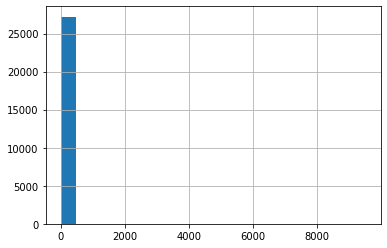

In [79]:
repeated_names[repeated_names.issn_count > 3].issn_count.hist(bins=20)

<AxesSubplot:>

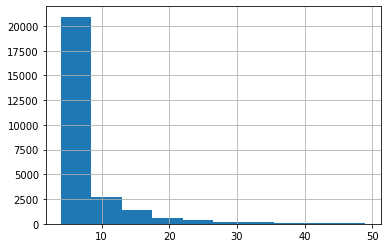

In [80]:
repeated_names[(repeated_names.issn_count > 3) & (repeated_names.issn_count < 50)].issn_count.hist(bins=10)

<AxesSubplot:>

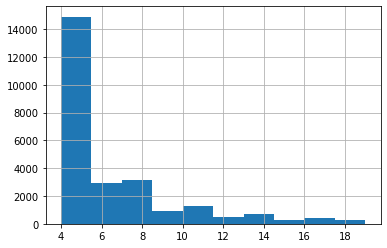

In [81]:
repeated_names[(repeated_names.issn_count > 3) & (repeated_names.issn_count < 20)].issn_count.hist(bins=10)

<AxesSubplot:>

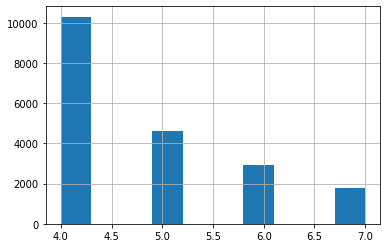

In [82]:
repeated_names[(repeated_names.issn_count > 3) & (repeated_names.issn_count < 8)].issn_count.hist()

<AxesSubplot:>

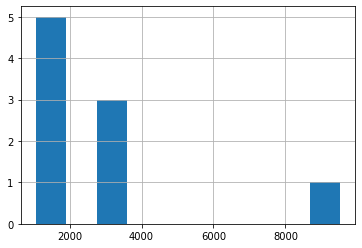

In [83]:
repeated_names[repeated_names.issn_count > 1000].issn_count.hist(bins=10)

In [84]:
repeated_names[repeated_names.issn_count > 1000]

,name,issn_count
3511,Bulletin.,2797
7652,Newsletter.,2773
8338,Rapport.,1062
23716,Proceedings.,1565
45931,Annual report /,1382
45999,Annual report.,9520
46056,Annuaire.,1263
47310,Rapport annuel.,2811
72341,Annual report,1074


In [85]:
repeated_names[repeated_names.issn_count > 500]

,name,issn_count
103,Bulletin d'information.,696
3230,Bulletin de liaison.,512
3511,Bulletin.,2797
7652,Newsletter.,2773
8338,Rapport.,1062
23716,Proceedings.,1565
45886,Report.,764
45931,Annual report /,1382
45999,Annual report.,9520
46056,Annuaire.,1263


In [86]:
repeated_names[repeated_names.issn_count > 200]

,name,issn_count
103,Bulletin d'information.,696
2676,Newsletter /,290
3230,Bulletin de liaison.,512
3511,Bulletin.,2797
3941,Boletín.,227
...,...,...
534658,Relatório e contas.,248
606501,Bildung und Beruf regional.,292
1013518,Vies de famille.,222
1117647,Country risk service.,271


In [87]:
repeated_names[repeated_names.issn_count > 100]

,name,issn_count
103,Bulletin d'information.,696
2676,Newsletter /,290
3230,Bulletin de liaison.,512
3511,Bulletin.,2797
3941,Boletín.,227
...,...,...
1315194,Country commerce.,120
1327255,Bible studies for life.,159
1805527,LexisNexis practice guide.,110
2637306,Operational risk report.,119


In [88]:
repeated_names

,name,issn_count
2,The publishers weekly.,2
3,Publishers weekly,2
6,Activitas Nervosa Superior.,2
12,Library journal.,2
24,Acta cardiologica.,2
...,...,...
2938851,AAPS introductions in the pharmaceutical scien...,2
2938852,AAPS introductions in the pharmaceutical scien...,2
2938856,Verzeichniss der Werke lebender Künstler auf d...,2
2938857,"IEEE Advanced Information Management, Communic...",2


If a name matches a repeated name exactly or fuzzy matches to a repeated name and there is not other information available, the match status must be ambigious.

In [89]:
mapping["Nigerian Journal of Wildlife Management"]

['2735-9298', '2735-928X']

These are two ISSN refering to the same journal.

In [90]:
import requests

In [91]:
requests.get("https://portal.issn.org/resource/ISSN/2735-928X?format=json").json()

{'@graph': [{'@id': 'http://id.loc.gov/vocabulary/countries/nr',
   'label': 'Nigeria'},
  {'@id': 'organization/ISSNCenter#_e',
   '@type': 'http://schema.org/Organization'},
  {'@id': 'resource/ISSN-L/2735-9298',
   'identifiedBy': 'resource/ISSN/2735-928X#ISSN-L'},
  {'@id': 'resource/ISSN/2735-928X',
   '@type': ['http://id.loc.gov/ontologies/bibframe/Work',
    'http://id.loc.gov/ontologies/bibframe/Instance',
    'http://schema.org/Periodical'],
   'identifiedBy': ['resource/ISSN/2735-928X#ISSN-L',
    'resource/ISSN/2735-928X#ISSN',
    'resource/ISSN/2735-928X#KeyTitle'],
   'mainTitle': 'Nigerian Journal of Wildlife Management',
   'otherPhysicalFormat': 'resource/ISSN/2735-9298',
   'title': 'resource/ISSN/2735-928X#KeyTitle',
   'format': 'vocabularies/medium#Online',
   'identifier': '2735-928X',
   'isFormatOf': 'resource/ISSN/2735-9298',
   'type': 'http://marc21rdf.info/terms/formofmaterial#a',
   'http://purl.org/ontology/bibo/issn': '2735-928X',
   'isPartOf': 'resourc

Interestingly, most (80%) journal do not seem to have the distinction between electronic and print. But it may be that names are not used consistently.

In [94]:
len(unique_name) / len(df)

0.8004443220991548

In [96]:
unique_name.sample(n=10)

,name,issn_count
1848393,Aux petits bonheurs des enfants,1
1147789,Statistik om boliger ... i Aalborg Kommune.,1
2789832,Mur (Regensburg),1
35201,Boletín de la Sociedad Vasco-Navarra de pediat...,1
1955109,Cucina piatti unici.,1
1039,ABD,1
2595157,Tribuna quinzenal de Mataró,1
416131,Japan high tech review,1
2885449,Revista cósmica calavera.,1
343232,First days.,1


## Example "Fieldiana"

* "Fieldiana. Anthropology"
* https://www.jstor.org/journal/fieldianaanthro

In [97]:
mapping["Fieldiana. Anthropology"]

['2162-4321', '0071-4739']

However, jstor reports two ISSN: INSSP: 0071-4739, EISSN: 2162-4321 - but ISSN.org does not know about it?

In [98]:
unique_issn = set([item for v in mapping.values() for item in v])

In [99]:
"2162-4321" in unique_issn

True

In [100]:
for k, v in mapping.items():
    if "2162-4321" in v:
        print(k, v)

Fieldiana. ['2162-4267', '2162-4321', '2162-4291', '0096-2651', '0015-0746', '0097-3572', '2163-7105', '0071-4739', '0015-0754', '2158-5520', '0096-0438', '2162-4348']
Fieldiana. Anthropology ['2162-4321', '0071-4739']
Fieldiana. Anthropology (Online) ['2162-4321', '0071-4739']


As an example: when given a string like "Fieldiana" we would return ambiguous. But "Fieldiana. (Online)" might be matched to '2162-4321'. 

## Other Examples

In [101]:
repeated_names.sample(n=10)

,name,issn_count
571163,Afhandling.,2
1800364,Advances in e-business research series (Online),2
2476171,Journal of Automatic Control (Online),2
2756754,Gerencia de riesgos y seguros.,2
2799421,The skinny (Scotland ed. Online),2
1254438,Accessible news (Print),2
2177530,Biomathematical and biomechanical modeling of ...,2
2093431,Le Jura socialiste (Saint-Claude),2
2752857,European Journal of Formal Sciences and Engine...,2
389738,Austral journal of veterinary sciences (Online),2


In [102]:
mapping["Russian journal of coordination chemistry."]

['1608-3318', '1070-3284']

A new question: How many journals are listed under different names, yet still refer to the same journal?

In [103]:
mapping["San Bernardino County popular street atlas"]

['0733-2289']

## Journal of ...

In [104]:
df[df.name.str.startswith("Journal of")]

,name,issn_count
983,Journal of vocational behavior.,2
984,Journal of vocational behavior (Print),2
1213,Journal of American Concrete Institute.,1
1214,Journal of the American Concrete Institute,1
1317,Journal of the American Dental Hygienists' Ass...,1
...,...,...
2938472,Journal of surgical procedures and case reports,1
2938580,Journal of Epidermiological Society of Nigeria...,2
2938581,Journal of Epidermiological Society of Nigeria,2
2938795,Journal of Practicing Teachers,1
